# Regressão 01 - tarefa 01

In [91]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [92]:
# a)
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

reg = smf.ols('tip ~ net_bill', data = tips).fit()

dados_novos = tips[0:5]
reg.predict(dados_novos)

reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        22:59:45   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

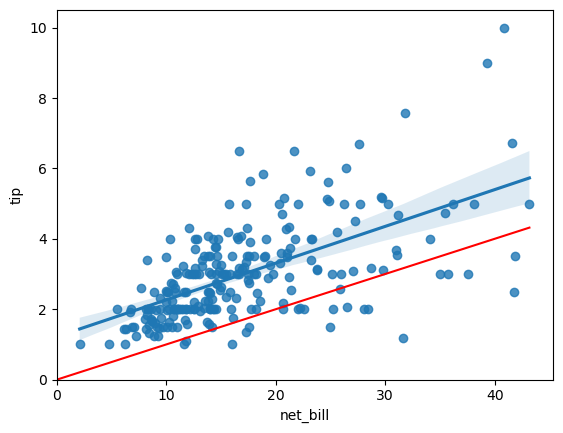

In [93]:
#b)
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x
plt.plot(x, y, '-r', label='linha dos 10%')
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [94]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()

dados_novos = tips[0:5]
reg2.predict(dados_novos)

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        22:59:52   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

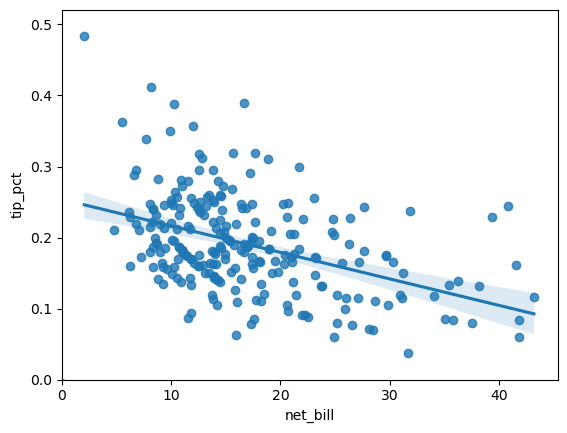

In [95]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
x = np.linspace(0,tips['net_bill'].max(),100)
y = (-0.0061)*x
plt.plot(x, y, '-r')
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [96]:

# Comparando os valores de R² das regressões reg e reg2
print(f"R² da regressão reg (tip ~ net_bill): {reg.rsquared:.4f}")
print(f"R² da regressão reg2 (tip_pct ~ net_bill): {reg2.rsquared:.4f}")

if reg.rsquared > reg2.rsquared:
    print("A regressão reg (tip ~ net_bill) possui a melhor amostragem.")
else:
    print("A regressão reg2 (tip_pct ~ net_bill) possui a melhor amostragem.")

R² da regressão reg (tip ~ net_bill): 0.3325
R² da regressão reg2 (tip_pct ~ net_bill): 0.0913
A regressão reg (tip ~ net_bill) possui a melhor amostragem.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [97]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51


In [98]:
#1)
pred = reg.fittedvalues[tips['tip_pct'] < .5]
pred

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 242, dtype: float64

In [99]:
#2)
reg4 = smf.ols('tip ~ (tip_pct * net_bill)', data = tips).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.290e+31
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:00:21   Log-Likelihood:                 7894.1
No. Observations:                 244   AIC:                        -1.578e+04
Df Residuals:                     240   BIC:                        -1.577e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.388e-16   4.23e-16      0.328      0.743   -6.95e-16    9.72e-16
tip_pct           5.995e-15   1.06e-15      5.669      0.000    3.91e-15    8.08e-15
net_bill          6.245e-17   2.55e-17      2.444      0.015    1.21e-17    1.13e-16
tip_pct:net_bill     1.0000   1.46e-16   6.86e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      454.551   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197901.160
Skew:                         -10.459   Prob(JB):                         0.00
Kurtosis:                     140.942   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#3)
reg4.rsquared

1.0

In [102]:
#4)
# Comparando os valores de R² das regressões reg e reg4
print(f"R² da regressão reg (tip ~ net_bill): {reg.rsquared:.4f}")
print(f"R² da regressão reg4 (tip ~ (tip_pct * net_bill): {reg4.rsquared:.4f}")

if reg.rsquared > reg4.rsquared:
    print("A regressão reg (tip ~ net_bill) possui a melhor amostragem.")
else:
    print("A regressão reg4 (tip ~ (tip_pct * net_bill) possui a melhor amostragem.")

R² da regressão reg (tip ~ net_bill): 0.3325
R² da regressão reg4 (tip ~ (tip_pct * net_bill): 1.0000
A regressão reg4 (tip ~ (tip_pct * net_bill) possui a melhor amostragem.
